# Digit Recognizer

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict

df_train = pd.read_csv(os.path.join(os.getcwd(), 'kaggle/Digit_recognizer/train.csv'))
df_test = pd.read_csv(os.path.join(os.getcwd(), 'kaggle/Digit_recognizer/test.csv'))

y_train = df_train.pop('label')
X_train = df_train.values
X_test = df_test.values

# Train Multi Layer Preceptron

In [15]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes = [100], random_state = 0)
nn.fit(X_train, y_train)

predictions = nn.predict(X_test)
print(predictions[:10])

scores = cross_val_score(nn, X_train, y_train, scoring='accuracy', cv=3)
print('Acurracy for NN MLPClassifier is: ', scores)

[2 0 9 4 3 7 0 3 0 3]
Acurracy for NN MLPClassifier is:  [0.93858897 0.93691956 0.93899128]


# Manual check

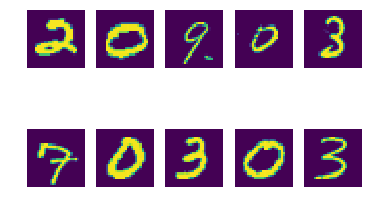

In [16]:
fig = plt.figure()
for i in range(10):
    fig.add_subplot(2, 5, i+1)
    X1 = X_test[i].reshape(28,28)
    plt.imshow(X1)
    plt.axis('off')

# Plot Confusion Matrix

             precision    recall  f1-score   support

          0       0.96      0.96      0.96      4132
          1       0.97      0.98      0.97      4684
          2       0.93      0.93      0.93      4177
          3       0.91      0.92      0.92      4351
          4       0.93      0.93      0.93      4072
          5       0.91      0.92      0.92      3795
          6       0.95      0.95      0.95      4137
          7       0.95      0.95      0.95      4401
          8       0.92      0.88      0.90      4063
          9       0.90      0.92      0.91      4188

avg / total       0.93      0.93      0.93     42000



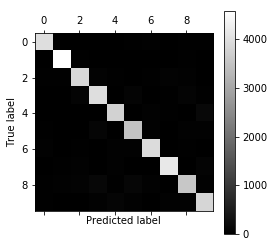

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict = cross_val_predict(nn, X_train, y_train, cv = 3)
print(classification_report(y_train, y_predict))
confusion = confusion_matrix(y_train, y_predict)
plt.matshow(confusion, cmap = plt.cm.gray)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

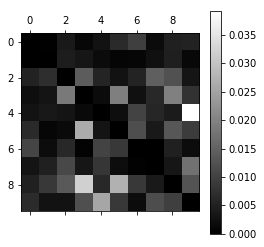

In [19]:
row_sums = confusion.sum(axis = 1, keepdims = True)
norm_confusion = confusion/row_sums # normalize the confusion matrix to check the errors
np.fill_diagonal(norm_confusion, 0)
plt.matshow(norm_confusion, cmap = plt.cm.gray)
plt.colorbar()

# Add Random Noise to the Digits

(-0.5, 27.5, 27.5, -0.5)

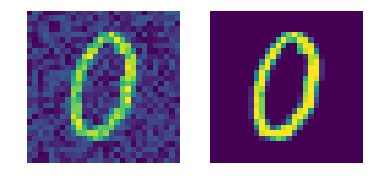

In [41]:
noise1 = np.random.randint(0, 100, (len(X_train), 784))
noise2 = np.random.randint(0, 100, (len(X_test), 784))
X_train_noise = X_train + noise1
X_test_noise = X_test + noise2
y_train_noise = X_train

fig_noise = plt.figure()
fig_noise.add_subplot(1,2,1)
plt.imshow(X_train_noise[5].reshape(28,28))
plt.axis('off')
fig_noise.add_subplot(1,2,2)
plt.imshow(X_train[5].reshape(28,28))
plt.axis('off')

# Digit Cleaner (Multi output classifier)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_noise, y_train_noise)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

(-0.5, 27.5, 27.5, -0.5)

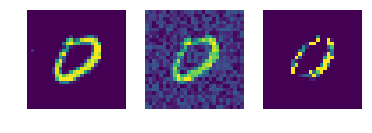

In [42]:
clean_digit = knn_clf.predict([X_test_noise[3]])
fig_test = plt.figure()
fig_test.add_subplot(1,3,1)
plt.imshow(X_test[3].reshape(28,28)) # Original X_test
plt.axis('off')
fig_test.add_subplot(1,3,2)
plt.imshow(X_test_noise[3].reshape(28,28)) # Noisy X_test_noise
plt.axis('off')
fig_test.add_subplot(1,3,3)
plt.imshow(clean_digit.reshape(28,28)) # Cleaned (predicted) digit from KNN
plt.axis('off')

# Support Vector Machine Classifier

In [2]:
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler

# Randomly shuffle the data
np.random.seed(42)
rnd_idx = np.random.permutation(np.shape(X_train)[0])
X_train = X_train[rnd_idx]
y_train = y_train[rnd_idx]

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [5]:
SVM_clf = SVC() # Use default rfb kernel
SVM_clf.fit(X_train_scaled[:10000], y_train[:10000])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
predictions_svm = SVM_clf.predict(X_test_scaled[:10])
print(predictions_svm)

scores_svm = cross_val_score(SVM_clf, X_train_scaled[:10000], y_train[:10000], scoring='accuracy', cv = 3)
print('Acurracy for rbf SVM is: ', scores_svm)

[2 0 9 4 3 7 0 3 0 3]
Acurracy for rbf SVM is:  [0.92775779 0.93491302 0.93543544]


In [10]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

rnd_parameter = {'gamma': reciprocal(0.001, 0.1), 'C': uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(SVM_clf, rnd_parameter, n_iter = 10)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023D317925C0>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023D31090F28>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [14]:
print('Best estimator: ', rnd_search_cv.best_estimator_)
print('Best score: ', rnd_search_cv.best_score_)

Best estimator:  SVC(C=8.849492188798576, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0013930344710471703,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Best score:  0.876


In [20]:
from sklearn.metrics import accuracy_score

prediction_cv = cross_val_predict(rnd_search_cv.best_estimator_, X_train_scaled, y_train, cv = 3)
print('Best accuracy of rbf SVC: ', accuracy_score(y_train, prediction_cv))
# cross_val_score(rnd_search_cv.best_estimator_, X_train_scaled[:10000], y_train[:10000], cv = 3)

Best accuracy of rbf SVC:  0.9634047619047619
